In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [214]:
df = pd.read_csv('Comp loan.csv')

In [215]:
df.head(10)

,Unnamed: 0,id,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,owner_2_score,RATE_owner_2,CAP_AMOUNT_owner_2,PERCENT_OWN_owner_2,...,INPUT_VALUE_ID_FOR_avg_net_deposits,RATE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,RATE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,deal_application_thread_id,completion_status
0,900,4813,606.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,606.0,A,150000.0,100.0,4642.0,Paid off with renewal
1,329,1406,703.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,107027.250000,NaN,preferred,NaN,703.0,A,150000.0,100.0,1362.0,Paid in full
2,1035,7415,692.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,692.0,A,150000.0,100.0,6485.0,Default
3,1670,6759,684.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,684.0,A,150000.0,100.0,6035.0,Paid via discounted payoff
4,1726,5867,625.0,A,150000.0,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,625.0,A,150000.0,100.0,5299.0,Paid in full
5,1900,7491,677.0,A,150000.0,50.0,654.0,A,150000.0,50.0,...,407304.500000,NaN,preferred,NaN,665.0,A,150000.0,100.0,6518.0,Default
6,1885,9464,601.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,78771.700000,NaN,preferred,NaN,601.0,B,100000.0,100.0,7777.0,Default
7,108,562,525.0,C,35000.0,100.0,NaN,NaN,NaN,NaN,...,20348.333333,NaN,preferred,NaN,525.0,C,35000.0,100.0,486.0,Paid off with renewal
8,951,6715,588.0,B,100000.0,100.0,NaN,NaN,NaN,NaN,...,15947.666667,NaN,preferred,NaN,588.0,B,100000.0,100.0,5972.0,Paid off with renewal
9,1335,3257,0.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,...,0.000000,NaN,preferred,NaN,0.0,NaN,NaN,0.0,3435.0,Paid off with renewal


In [216]:
df.shape

(1810, 56)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                1810 non-null   int64  
 1   id                                        1810 non-null   int64  
 2   owner_1_score                             1786 non-null   float64
 3   RATE_owner_1                              1780 non-null   object 
 4   CAP_AMOUNT_owner_1                        1775 non-null   float64
 5   PERCENT_OWN_owner_1                       1793 non-null   float64
 6   owner_2_score                             214 non-null    float64
 7   RATE_owner_2                              214 non-null    object 
 8   CAP_AMOUNT_owner_2                        202 non-null    float64
 9   PERCENT_OWN_owner_2                       259 non-null    float64
 10  owner_3_score                       

In [218]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
owner_1_score,24
RATE_owner_1,30
CAP_AMOUNT_owner_1,35
PERCENT_OWN_owner_1,17
owner_2_score,1596
RATE_owner_2,1596
CAP_AMOUNT_owner_2,1608
PERCENT_OWN_owner_2,1551


In [219]:
df = df.drop(["Unnamed: 0", "id", "deal_application_thread_id" , 'owner_2_score', 'RATE_owner_2', 'CAP_AMOUNT_owner_2', 'PERCENT_OWN_owner_2',
    'owner_3_score', 'RATE_owner_3', 'CAP_AMOUNT_owner_3', 'PERCENT_OWN_owner_3',
    'RATE_ID_FOR_fsr', 'RATE_ID_FOR_funded_last_30', 'INPUT_VALUE_ID_FOR_judgement_lien_time',
    'RATE_ID_FOR_judgement_lien_time', 'RATE_ID_FOR_avg_net_deposits', 'RATE_ID_FOR_industry_type'], axis=1)


In [220]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [221]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object" and col != "completion_status":
        df[col] = encoder.fit_transform(df[col])


status_map = {
    "Paid off with renewal": 1,
    "Paid in full": 1,
    "Paid via discounted payoff": 1,
    "Default": 0
}


df["completion_status"] = df["completion_status"].map(status_map)





In [222]:
df.head(10)

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,funded_last_30,...,RATE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,completion_status
0,606.0,0,150000.0,100.0,2.07,0,31.0,1,0,0,...,0,0.0,0,0.000000,2,606.0,0,150000.0,100.0,1
1,703.0,0,150000.0,100.0,26.57,0,73.0,3,0,0,...,0,1.0,0,107027.250000,2,703.0,0,150000.0,100.0,1
2,692.0,0,150000.0,100.0,42.10,0,19.0,1,0,0,...,0,0.0,0,0.000000,2,692.0,0,150000.0,100.0,0
3,684.0,0,150000.0,100.0,5.53,0,31.0,1,0,0,...,0,0.0,0,0.000000,2,684.0,0,150000.0,100.0,1
4,625.0,0,150000.0,100.0,1.65,1,31.0,1,0,0,...,0,0.0,0,0.000000,2,625.0,0,150000.0,100.0,1
5,677.0,0,150000.0,50.0,0.99,2,6.0,3,0,0,...,0,1.0,0,407304.500000,2,665.0,0,150000.0,100.0,0
6,601.0,1,100000.0,100.0,3.94,0,26.0,3,0,0,...,0,1.0,0,78771.700000,2,601.0,1,100000.0,100.0,0
7,525.0,2,35000.0,100.0,1.66,1,31.0,3,0,0,...,0,1.0,0,20348.333333,2,525.0,2,35000.0,100.0,1
8,588.0,1,100000.0,100.0,5.64,0,29.0,3,0,0,...,0,0.0,0,15947.666667,2,588.0,1,100000.0,100.0,1
9,0.0,0,150000.0,100.0,0.93,2,31.0,1,0,0,...,0,0.0,0,0.000000,2,0.0,0,150000.0,0.0,1


In [223]:
df.isnull().sum()

,0
owner_1_score,0
RATE_owner_1,0
CAP_AMOUNT_owner_1,0
PERCENT_OWN_owner_1,0
years_in_business,0
RATE_ID_FOR_years_in_business,0
fsr,0
location,0
RATE_ID_FOR_location,0
funded_last_30,0


In [224]:



scaler = MinMaxScaler()


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('completion_status')


df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [225]:
df.head(10)

,owner_1_score,RATE_owner_1,CAP_AMOUNT_owner_1,PERCENT_OWN_owner_1,years_in_business,RATE_ID_FOR_years_in_business,fsr,location,RATE_ID_FOR_location,funded_last_30,...,RATE_ID_FOR_tax_lien_count,INPUT_VALUE_ID_FOR_current_position,RATE_ID_FOR_current_position,INPUT_VALUE_ID_FOR_avg_net_deposits,INPUT_VALUE_ID_FOR_industry_type,INPUT_VALUE_owner_4,RATE_owner_4,CAP_AMOUNT_owner_4,PERCENT_OWN_owner_4,completion_status
0,0.067318,0.00,1.000000,0.10,0.001130,0.000000,0.306122,0.333333,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.666667,0.067318,0.00,1.000000,0.1,1
1,0.078094,0.00,1.000000,0.10,0.014701,0.000000,0.734694,1.000000,0.0,0.0,...,0.0,0.25,0.0,0.046707,0.666667,0.078094,0.00,1.000000,0.1,1
2,0.076872,0.00,1.000000,0.10,0.023303,0.000000,0.183673,0.333333,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.666667,0.076872,0.00,1.000000,0.1,0
3,0.075983,0.00,1.000000,0.10,0.003046,0.000000,0.306122,0.333333,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.666667,0.075983,0.00,1.000000,0.1,1
4,0.069429,0.00,1.000000,0.10,0.000897,0.333333,0.306122,0.333333,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.666667,0.069429,0.00,1.000000,0.1,1
5,0.075206,0.00,1.000000,0.05,0.000532,0.666667,0.051020,1.000000,0.0,0.0,...,0.0,0.25,0.0,0.177747,0.666667,0.073872,0.00,1.000000,0.1,0
6,0.066763,0.25,0.666667,0.10,0.002166,0.000000,0.255102,1.000000,0.0,0.0,...,0.0,0.25,0.0,0.034376,0.666667,0.066763,0.25,0.666667,0.1,0
7,0.058320,0.50,0.233333,0.10,0.000903,0.333333,0.306122,1.000000,0.0,0.0,...,0.0,0.25,0.0,0.008880,0.666667,0.058320,0.50,0.233333,0.1,1
8,0.065319,0.25,0.666667,0.10,0.003107,0.000000,0.285714,1.000000,0.0,0.0,...,0.0,0.00,0.0,0.006960,0.666667,0.065319,0.25,0.666667,0.1,1
9,0.000000,0.00,1.000000,0.10,0.000499,0.666667,0.306122,0.333333,0.0,0.0,...,0.0,0.00,0.0,0.000000,0.666667,0.000000,0.00,1.000000,0.0,1


In [226]:
df['completion_status'].value_counts()


,count
completion_status,
1,1308
0,502


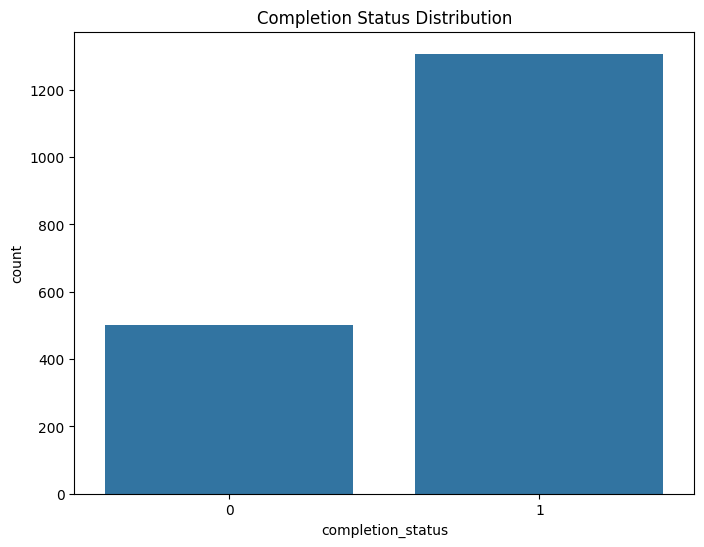

In [227]:
plt.figure(figsize=(8, 6))
sns.countplot(x='completion_status', data=df)
plt.title('Completion Status Distribution')
plt.show()

In [228]:

# TOP MOST IMPORTANT FEATURES

X = df.drop(['completion_status'], axis=1)

y = df['completion_status']





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)




clf = RandomForestClassifier(n_estimators=100, random_state=0)


clf.fit(X_train, y_train)


feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
years_in_business,0.138834
INPUT_VALUE_owner_4,0.112734
fsr,0.110796
owner_1_score,0.106508
INPUT_VALUE_ID_FOR_num_deposits,0.064145
INPUT_VALUE_ID_FOR_monthly_gross,0.064094
INPUT_VALUE_ID_FOR_avg_net_deposits,0.063542
INPUT_VALUE_ID_FOR_average_ledger,0.057243
INPUT_VALUE_ID_FOR_fc_margin,0.046161
INPUT_VALUE_ID_FOR_num_negative_days,0.041438


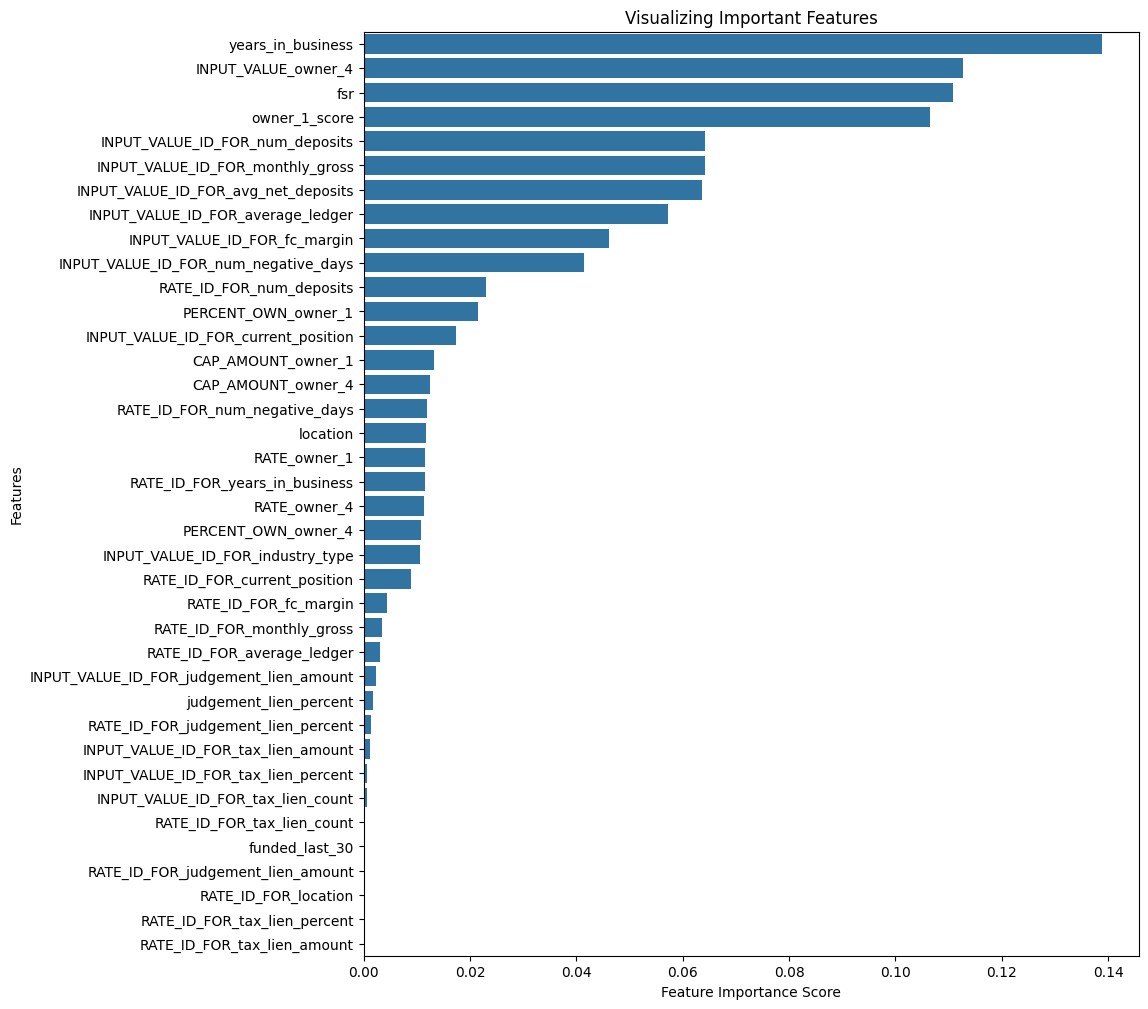

In [229]:


plt.figure(figsize=(10, 12))

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()


In [230]:

# Decesion Tree

top_features = [
     'years_in_business',
    'INPUT_VALUE_owner_4',
    'owner_1_score',
    'fsr',
    'INPUT_VALUE_ID_FOR_monthly_gross',
    'INPUT_VALUE_ID_FOR_avg_net_deposits',
    'INPUT_VALUE_ID_FOR_num_deposits',
    'INPUT_VALUE_ID_FOR_average_ledger',
    'INPUT_VALUE_ID_FOR_fc_margin',
    'INPUT_VALUE_ID_FOR_num_negative_days',
    'PERCENT_OWN_owner_1',
    'RATE_ID_FOR_num_deposits',
    'RATE_owner_4',
    'location',
    'INPUT_VALUE_ID_FOR_current_position',
    'RATE_owner_1',
    'CAP_AMOUNT_owner_1',
    'CAP_AMOUNT_owner_4',
    'RATE_ID_FOR_years_in_business'


]

X = df[top_features]
y = df['completion_status']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


dt_model = DecisionTreeClassifier(

)


dt_model.fit(X_train, y_train)


y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)


print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 0.9951657458563536
Test Accuracy: 0.9060773480662984


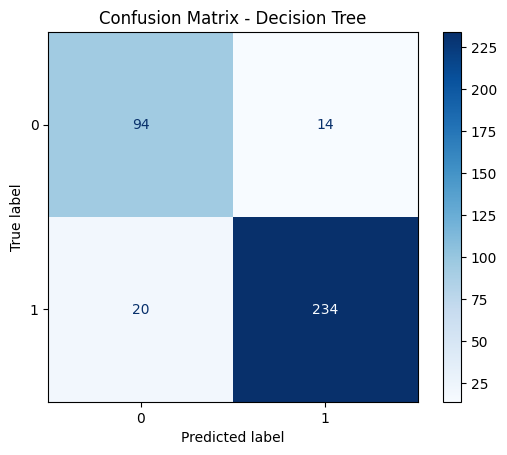

In [231]:
cm = confusion_matrix(y_test, y_test_pred, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)


disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

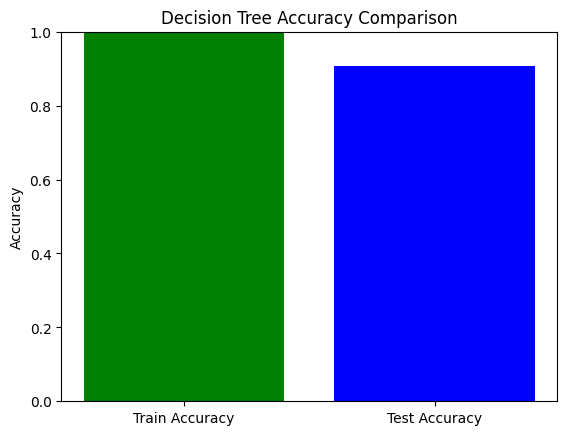

In [232]:



train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["green", "blue"])
plt.ylim(0,1)
plt.title("Decision Tree Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [233]:
# Random Forrest

top_features = [
     'years_in_business',
    'INPUT_VALUE_owner_4',
    'owner_1_score',
    'fsr',
    'INPUT_VALUE_ID_FOR_monthly_gross',
    'INPUT_VALUE_ID_FOR_avg_net_deposits',
    'INPUT_VALUE_ID_FOR_num_deposits',
    'INPUT_VALUE_ID_FOR_average_ledger',
    'INPUT_VALUE_ID_FOR_fc_margin',
    'INPUT_VALUE_ID_FOR_num_negative_days',
    'PERCENT_OWN_owner_1',
    'RATE_ID_FOR_num_deposits',
    'RATE_owner_4',
    'location',
    'INPUT_VALUE_ID_FOR_current_position',
    'RATE_owner_1',
    'CAP_AMOUNT_owner_1',
    'CAP_AMOUNT_owner_4',
    'RATE_ID_FOR_years_in_business'


]

X_top = df[top_features]
y = df['completion_status']



X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)




clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)


y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print("Training Accuracy: {0:0.4f}".format(accuracy_score(y_train, y_train_pred)))
print("Test Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_test_pred)))



Training Accuracy: 0.9938
Test Accuracy: 0.9503


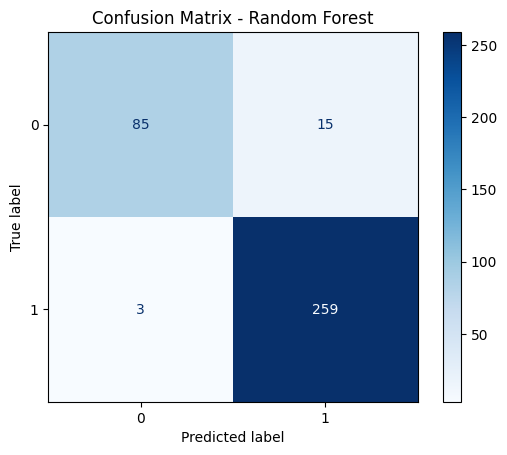

In [234]:
cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

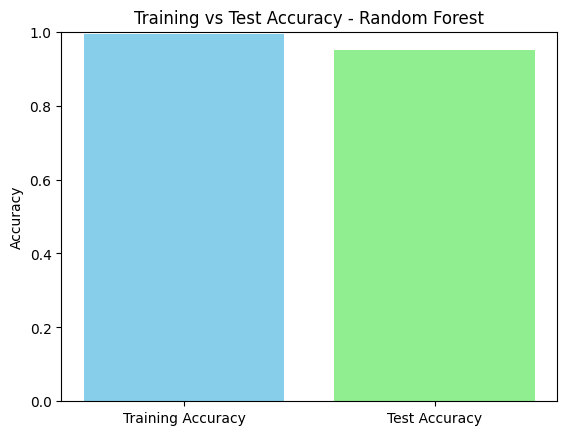

In [235]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


plt.bar(["Training Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "lightgreen"])
plt.ylim(0, 1)
plt.title("Training vs Test Accuracy - Random Forest")
plt.ylabel("Accuracy")
plt.show()

In [236]:
# Logistic reg


top_features = [
     'years_in_business',
    'INPUT_VALUE_owner_4',
    'owner_1_score',
    'fsr',
    'INPUT_VALUE_ID_FOR_monthly_gross',
    'INPUT_VALUE_ID_FOR_avg_net_deposits',
    'INPUT_VALUE_ID_FOR_num_deposits',
    'INPUT_VALUE_ID_FOR_average_ledger',
    'INPUT_VALUE_ID_FOR_fc_margin',
    'INPUT_VALUE_ID_FOR_num_negative_days',
    'PERCENT_OWN_owner_1',
    'RATE_ID_FOR_num_deposits',
    'RATE_owner_4',
    'location',
    'INPUT_VALUE_ID_FOR_current_position',
    'RATE_owner_1',
    'CAP_AMOUNT_owner_1',
    'CAP_AMOUNT_owner_4',
    'RATE_ID_FOR_years_in_business'


]

X = df[top_features]
y = df['completion_status']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


logreg = LogisticRegression(

    class_weight='balanced',  # handles imbalanced classes

)


logreg.fit(X_train, y_train)


y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)


print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))





Training Accuracy: 0.6208563535911602
Test Accuracy: 0.574585635359116


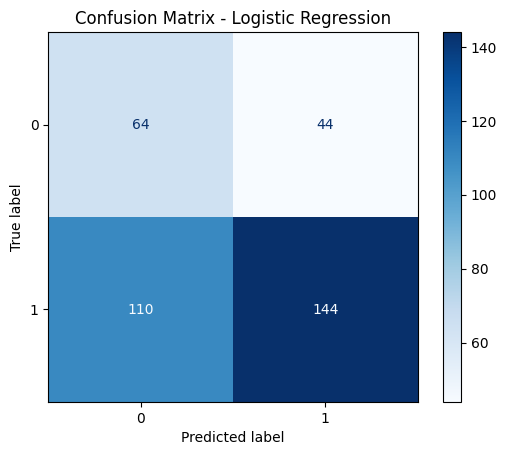

In [237]:
cm = confusion_matrix(y_test, y_test_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)


disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

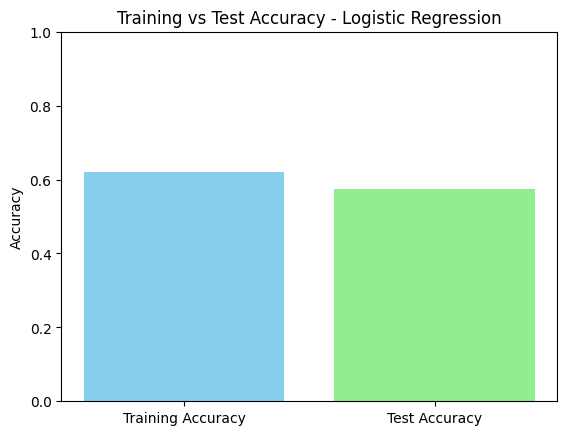

In [238]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


plt.bar(["Training Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue", "lightgreen"])
plt.ylim(0, 1)
plt.title("Training vs Test Accuracy - Logistic Regression")
plt.ylabel("Accuracy")
plt.show()